In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
df = pd.read_csv("Public_records.csv", header=0, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [3]:
pd.options.display.float_format = '{:.0f}'.format
df['filed_date'] = pd.to_datetime(df['filed_date'], yearfirst=True, format='%Y%m%d') ## change formats for later analysis
df['effective_date_date_verified'] = pd.to_datetime(df['effective_date_date_verified'], yearfirst=True, format='%Y%m%d')
df['paid_date'] = pd.to_datetime(df['paid_date'], yearfirst=True, format='%Y%m%d')
df.head()

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code
0,1346747,ZP,99,CJ,2013-06-04,2013-01-29,NaT,1209,CI,I,1
1,1346748,ZP,485,7X,2014-09-25,2014-05-06,2014-09-24,nan,FE,I,1
2,1346754,Z,11R,SL,2012-01-24,2011-04-05,NaT,2248,RD,I,1
3,1346754,ZP,1,7X,2013-01-29,2012-09-28,2013-01-28,nan,FE,C,1
4,1346756,ZP,1,RL,2014-09-13,2007-02-02,2014-08-01,406,RD,I,1


In [4]:
df.shape ## 218,303 records total

(218303, 11)

In [5]:
len(df['analytics_matchkey'].unique()) ## number of unique IDs

134717

In [6]:
records_per_matchkey = df.groupby('analytics_matchkey').size().sort_values(ascending=False)
more_than_one_record = len(records_per_matchkey[records_per_matchkey > 1])
total_unique_IDs = len(df['analytics_matchkey'].unique())
more_than_one_record/total_unique_IDs * 100 ## 32% of IDs have more than one record in this time period


32.8006116525754

In [7]:
records_per_matchkey.sort_values(ascending=False)[0:10] ## one person has 87 records in this period! Others have >30, etc

analytics_matchkey
1452992    87
1366619    86
1470959    46
1976457    41
1913669    34
1594223    33
1439879    31
1797022    31
1976283    28
1378671    27
dtype: int64

In [8]:
record_type_proportions = df['public_record_type_code'].value_counts(normalize=True)*100 
## most of records are Civil Judgement 
record_type_proportions[0:5]

CJ   28
7X   23
PC   14
RL    9
SL    7
Name: public_record_type_code, dtype: float64

In [9]:
df.isnull().sum() ## check how many nulls per column

analytics_matchkey                       0
industry_code_kind_of_business           0
reporting_subscriber_code                0
public_record_type_code                  0
effective_date_date_verified           285
filed_date                               0
paid_date                            88882
amount                               61511
public_record_source_type_code           1
equal_credit_opportunity_act_code        0
legislative_prohibited_code              0
dtype: int64

In [10]:
df['industry_code_kind_of_business'].value_counts() ## only two different industry codes in the dataset

ZP    198571
Z      19732
Name: industry_code_kind_of_business, dtype: int64

In [11]:
df['amount'].describe() 
## of the rows/records with an amount value, 75% are at or below $3,174. Not sure if 9999999 is a null/missing value or not

count    156792
mean       4617
std       41801
min           0
25%         644
50%        1338
75%        3174
max     9999999
Name: amount, dtype: float64

In [12]:
df['amount'].sort_values(ascending=False)[0:10] ## given very high max value for amount, looked at top 10 values

35358    9999999
186714   9999999
126489   2696174
82904    1912871
196368   1625836
62234    1612991
24388    1442092
22257    1266928
69385    1225919
57807    1200089
Name: amount, dtype: float64

In [13]:
df[df['amount'] >= 1200089] ## most of the top 10 highest amounts were of Recorder of Deeds source type code

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code
22257,1412950,ZP,51Z,FT,2014-01-28,2013-12-31,NaT,1266928,RD,C,1
24388,1419201,ZP,314,FT,2010-04-20,2010-04-16,NaT,1442092,RD,I,1
35358,1451690,Z,11J,PF,2012-03-06,2009-09-24,2012-02-28,9999999,RD,I,1
57807,1518167,Z,19H,PF,2014-03-04,2007-02-09,2013-12-31,1200089,RD,I,1
62234,1530725,ZP,847,CJ,2013-05-22,2013-04-01,NaT,1612991,CI,I,1
62508,1531613,Z,19H,PF,2014-01-08,2007-02-09,2013-11-27,1200089,RD,I,1
69385,1551568,Z,130,CJ,2011-07-13,2010-02-05,NaT,1225919,CI,I,1
82904,1591558,ZP,447,PF,2007-04-11,2007-04-11,2010-07-01,1912871,RD,I,1
126489,1721497,ZP,365,RL,2010-10-13,2008-07-16,2010-09-02,2696174,RD,I,1
186714,1898185,ZP,141,RL,2010-07-09,2009-12-28,2010-06-25,9999999,RD,I,1


In [14]:
df_not_paid = df[df['paid_date'].isna()]

In [15]:
df_not_paid.shape[0]/df.shape[0] * 100  ## ~40.7 percent of records are unpaid or at least have a missing paid date value

40.71496956065651

In [16]:
df_paid = df[df['paid_date'].notna()] ## keeping these two dataframes for later investigation
df_paid['public_record_type_code'].value_counts()[0:5] ## of records that were paid, most are of type 7X followed by PC

7X    49841
PC    30449
RL    20099
CB    10240
PL     6172
Name: public_record_type_code, dtype: int64

In [17]:
df_paid[df_paid['public_record_type_code'] == '7X'].head() ## missing amounts for record type 7X

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code
1,1346748,ZP,485,7X,2014-09-25,2014-05-06,2014-09-24,nan,FE,I,1
3,1346754,ZP,1,7X,2013-01-29,2012-09-28,2013-01-28,nan,FE,C,1
9,1346767,ZP,120,7X,2010-08-12,2010-04-18,2010-08-11,nan,FE,C,1
14,1346786,ZP,35K,7X,2010-11-27,2010-07-29,2010-11-23,nan,FE,I,1
16,1346816,ZP,700,7X,2015-09-01,2015-05-13,2015-08-31,nan,FE,I,1


In [18]:
df['public_record_source_type_code'].value_counts(normalize=True)[0:5]*100 
##  most records are from Circuit Court, followed by Federal District

CI   45
FE   27
RD   25
MU    2
BK    1
Name: public_record_source_type_code, dtype: float64

c:\users\roblatch\desktop\python35\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\roblatch\desktop\python35\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


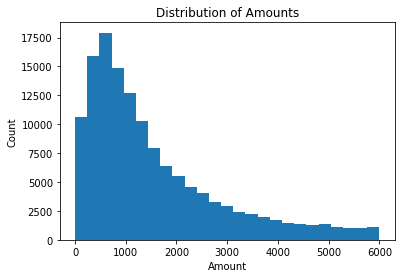

In [19]:
plt.title("Distribution of Amounts") ### to see the shape of the distribution of paid amounts, which has a long right tail. 
plt.ylabel("Count")
plt.xlabel("Amount")
plt.hist(df['amount'], range=(df['amount'].min(), 6000), bins=25); 

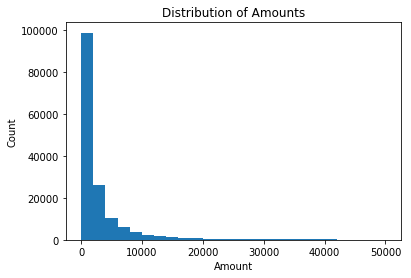

In [20]:
plt.title("Distribution of Amounts")
plt.ylabel("Count")
plt.xlabel("Amount")
plt.hist(df['amount'], range=(df['amount'].min(), 50000), bins=25); ## another view of the amount distribution

In [21]:
df_amount_not_null = df[df['amount'].notna()]
df_amount_not_null[df_amount_not_null['amount'] > 10000].shape[0] / df_amount_not_null.shape[0] * 100 
# only ~8% of amounts are greater than $10,000, but they have a large range

7.840323485892137

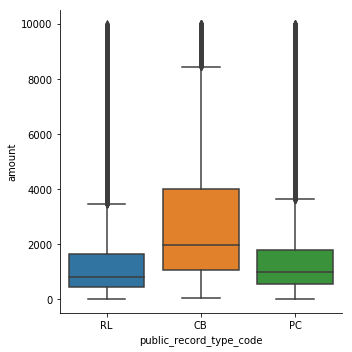

In [22]:
df_top_3_record_code = df[(df['public_record_type_code'] == '7X')| (df['public_record_type_code'] == 'PC') | (df['public_record_type_code'] == 'RL') | (df['public_record_type_code'] == 'CB')]
df_top_3_record_code = df_top_3_record_code[df_top_3_record_code['amount'] < 10000]
sns.catplot(x='public_record_type_code', y='amount', kind="box", data=df_top_3_record_code); 
## CB has the highest mean amount and the largest IQR, while both RL and PC have VERY long right tails

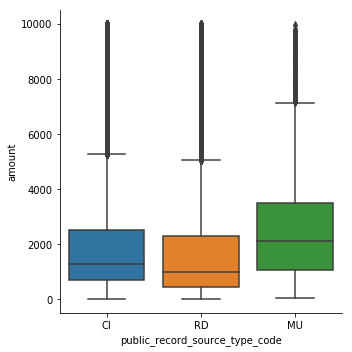

In [23]:
df_top_3_source_code = df[(df['public_record_source_type_code'] == 'CI')| (df['public_record_source_type_code'] == 'FE') | (df['public_record_source_type_code'] == 'RD') | (df['public_record_source_type_code'] == 'MU')]
df_top_3_source_code = df_top_3_source_code[df_top_3_source_code['amount'] < 10000]
sns.catplot(x='public_record_source_type_code', y='amount', kind="box", data=df_top_3_source_code); 
## Municipal Court does have a noticeably higher mean amount value compared to Circuit Court and Recorder of Deeds

In [24]:
df_100000 = df[df['amount'] > 100000]
df_100000['public_record_type_code'].value_counts() 
## majority of amounts over 100,000 are Federal Tax Lien record type

FT    347
PF    113
CJ     68
CB     32
SL     24
RL     12
PC     11
PL      2
Name: public_record_type_code, dtype: int64

In [25]:
df_100000['public_record_source_type_code'].value_counts() 
## majority of amounts over 100,000 are recorder of deeds source type

RD    501
CI     93
SU      7
CR      5
CC      3
Name: public_record_source_type_code, dtype: int64

In [26]:
df['month'] = df['filed_date'].dt.month ## processing date values for aggregate analysis
df['year'] = df['filed_date'].dt.year
df.month = df.month.astype(str)
df.year = df.year.astype(str)
df['month_year'] = df['month'] + "_" + df['year']
print(df['filed_date'].min())
print(df['paid_date'].min())
print(df['effective_date_date_verified'].min())
print(df['filed_date'].max()) 
print(df['paid_date'].max())
print(df['effective_date_date_verified'].max())
## the time series spans from 04/06/2006 until 09/29/2016

2006-04-06 00:00:00
2006-11-29 00:00:00
2007-01-19 00:00:00
2016-09-27 00:00:00
2016-09-28 00:00:00
2016-09-29 00:00:00


In [73]:
records_per_year = df.groupby('year').size() ## total records per year
records_per_year

year
2006      866
2007     5236
2008     7694
2009    15983
2010    37974
2011    34522
2012    31351
2013    27151
2014    25156
2015    20649
2016    11721
dtype: int64

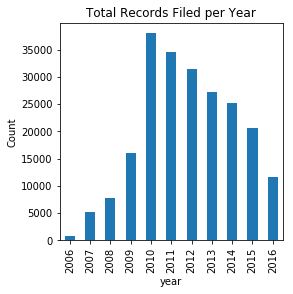

In [28]:
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
plt.figure(figsize=(4,4))

fig = records_per_year.plot(kind='bar')
fig.set_title("Total Records Filed per Year")
fig.set_ylabel('Count') 
fig.set_xticklabels(years); 
## looked at total records per year across entire Time Series. Most are in 2010, followed by 2011
## Given that our dataset only begins in october 2006, makes sense that 2006 would be very small in comparison
## Given that our dataset ends in 9-2016, makes sense that there would be a drop from 2015 to 2016

In [29]:
## Use month_year to find average amount of records for each month
month_year_totals = df.groupby('month_year').size()
month_year_totals = month_year_totals.to_frame()

month_year_totals = month_year_totals.rename(columns={0:'Total_Records'})
month_year_totals.reset_index(inplace=True)
month_year_totals[['month','year']] = month_year_totals.month_year.str.split("_", expand=True)
month_year_totals['month']=month_year_totals['month'].apply(lambda x: '{0:0>2}'.format(x))
month_year_totals['year_month_adj'] = month_year_totals['year'] + month_year_totals['month']
month_year_totals['year_month_adj'] = month_year_totals['year_month_adj'].astype(str)

month_year_totals = month_year_totals.sort_values(by=['year', 'month'], ascending=True)
month_year_totals = month_year_totals.drop(month_year_totals.index[[0,1]])
month_year_totals.head()


,month_year,Total_Records,month,year,year_month_adj
0,10_2006,79,10,2006,200610
10,11_2006,422,11,2006,200611
20,12_2006,363,12,2006,200612
30,1_2007,329,01,2007,200701
40,2_2007,352,02,2007,200702


In [30]:
month_averages = month_year_totals.groupby('month').mean()
month_averages = month_averages.reset_index()
month_averages['month'] = month_averages['month'].astype(int)
month_averages = month_averages.sort_values(by="month") ## to make sure data is in correct order
month_averages.head()

,month,Total_Records
0,1,1798
1,2,1759
2,3,2004
3,4,1885
4,5,1726


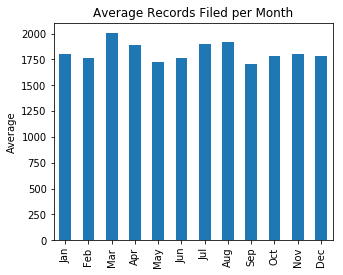

In [31]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(5,4))

fig = month_averages['Total_Records'].plot(kind='bar')
fig.set_title("Average Records Filed per Month")
fig.set_ylabel('Average')
fig.set_xticklabels(months); ## looked at average records filed per month across all years of Time Series. 
 ## On average, March had the highest amount of records filed

In [32]:
df_paid['Filed_to_Paid'] = df_paid['paid_date'] - df_paid['filed_date'] 
## to find time between filed_date and paid_date for each record
df_paid.head()

c:\users\roblatch\desktop\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,Filed_to_Paid
1,1346748,ZP,485,7X,2014-09-25,2014-05-06,2014-09-24,nan,FE,I,1,141 days
3,1346754,ZP,1,7X,2013-01-29,2012-09-28,2013-01-28,nan,FE,C,1,122 days
4,1346756,ZP,1,RL,2014-09-13,2007-02-02,2014-08-01,406,RD,I,1,2737 days
5,1346756,ZP,1,RL,2014-09-13,2008-03-12,2014-08-01,925,RD,I,1,2333 days
6,1346758,ZP,25N,PF,2016-01-22,2008-03-10,2013-05-23,32583,RD,I,1,1900 days


In [33]:
df_paid['Filed_to_Paid'].mean() 
## for all entries with a paid_date, the average time between the filing date and the paid date was 380 days (over a year!)

Timedelta('380 days 01:51:46.596301')

In [34]:
df_paid['month'] = df_paid['filed_date'].dt.month ## processing date values for aggregate analysis
df_paid['year'] = df_paid['filed_date'].dt.year
df_paid.month = df_paid.month.astype(str)
df_paid.year = df_paid.year.astype(str)

df_paid['Filed_to_Paid_days'] = (df_paid['Filed_to_Paid'].dt.total_seconds()/(60*60*24)) 
## converts to number of days in integer form
df_paid.head()

c:\users\roblatch\desktop\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\roblatch\desktop\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\roblatch\desktop\python35\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,Filed_to_Paid,month,year,Filed_to_Paid_days
1,1346748,ZP,485,7X,2014-09-25,2014-05-06,2014-09-24,nan,FE,I,1,141 days,5,2014,141
3,1346754,ZP,1,7X,2013-01-29,2012-09-28,2013-01-28,nan,FE,C,1,122 days,9,2012,122
4,1346756,ZP,1,RL,2014-09-13,2007-02-02,2014-08-01,406,RD,I,1,2737 days,2,2007,2737
5,1346756,ZP,1,RL,2014-09-13,2008-03-12,2014-08-01,925,RD,I,1,2333 days,3,2008,2333
6,1346758,ZP,25N,PF,2016-01-22,2008-03-10,2013-05-23,32583,RD,I,1,1900 days,3,2008,1900


In [35]:
filed_to_paid_years = df_paid.groupby('year')['Filed_to_Paid_days'].mean()
filed_to_paid_years ## average time between record filed and record paid, for each year of time series

year
2006   764
2007   562
2008   493
2009   453
2010   509
2011   428
2012   342
2013   268
2014   211
2015   146
2016    88
Name: Filed_to_Paid_days, dtype: float64

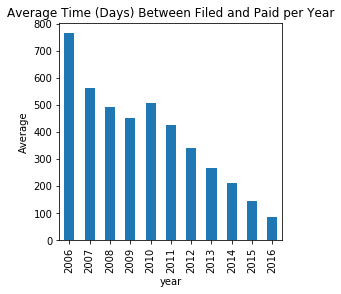

In [36]:
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
plt.figure(figsize=(4,4))

fig = filed_to_paid_years.plot(kind='bar')
fig.set_title("Average Time (Days) Between Filed and Paid per Year")
fig.set_ylabel('Average')
fig.set_xticklabels(years); 
## looked at average time between the record being filed and paid per year across entire Time Series. 
## There is a decreasing trend throughout the series, with the exception of 2010
## It makes sense that both 2015 and 2016 would be very low - as the only records with a paid_date would have to be within
## the range of our time series, which ends in 09-2016. If we later conducted this analysis including 2017 and 2018 data in addition to this data,
## the average time (days) between filed and paid for 2015 and 2016 would likely increase, 
## because more of the larger values would be included in the dataset

In [37]:
filed_to_paid_record_type = df_paid.groupby('public_record_type_code')['Filed_to_Paid_days'].mean()
filed_to_paid_record_type_10 = filed_to_paid_record_type.sort_values(ascending=True)[0:10]
filed_to_paid_record_type_10 ### of the paid records, the fasted paid on average are of type 7F, 7D, and 7X

public_record_type_code
7F   118
7D   131
7X   144
FT   286
CJ   299
PC   375
3D   413
PL   426
1D   470
CB   476
Name: Filed_to_Paid_days, dtype: float64

In [38]:
df_paid['public_record_type_code'].value_counts()[0:5] ## of the paid records, most are of type 7X

7X    49841
PC    30449
RL    20099
CB    10240
PL     6172
Name: public_record_type_code, dtype: int64

In [39]:
total_paid = df_paid.shape[0]
total = df.shape[0]
total_paid/total * 100 ## ~59 percent of loans have a paid date entry (paid)

59.28503043934348

In [40]:
df_no_na = df.dropna(subset=['amount']) ## average amount highest for FT (federal Tax Lien) and PF public record types
df_no_na.groupby('public_record_type_code')['amount'].mean().sort_values(ascending=False)[0:5]

public_record_type_code
FT   33205
PF   23991
TB   11739
CP    7714
CB    5245
Name: amount, dtype: float64

In [41]:
record_types_missing_paid_date = df_not_paid.groupby('public_record_type_code').size().sort_values(ascending=False)
record_types_missing_paid_date = record_types_missing_paid_date.to_frame()
record_types_missing_paid_date = record_types_missing_paid_date.rename(columns={0:'Total_Missing_Paid_Dates'})
record_types_missing_paid_date[0:5]

## find total number of records with missing paid_dates, grouped by public_record_type

,Total_Missing_Paid_Dates
public_record_type_code,
CJ,61412
SL,16197
FT,6505
3F,2183
TL,1764


In [42]:
record_types_with_paid_date = df_paid.groupby('public_record_type_code').size().sort_values(ascending=False)
record_types_with_paid_date = record_types_with_paid_date.to_frame()
record_types_with_paid_date = record_types_with_paid_date.rename(columns={0:'Total_Paid_Dates'})
record_types_with_paid_date[0:5]
## find total number of records with paid_dates, grouped by public_record_type

,Total_Paid_Dates
public_record_type_code,
7X,49841
PC,30449
RL,20099
CB,10240
PL,6172


In [43]:
## merge two dataframes together (paid and unpaid), both grouped by public_record_type_code
Paid_vs_not_Paid = record_types_with_paid_date.merge(record_types_missing_paid_date, left_index=True, right_index=True, how='outer')
Paid_vs_not_Paid = Paid_vs_not_Paid.fillna(0)
Paid_vs_not_Paid['Total_Records'] = Paid_vs_not_Paid['Total_Paid_Dates'] + Paid_vs_not_Paid['Total_Missing_Paid_Dates']
Paid_vs_not_Paid['Percent_of_Total_Paid'] = Paid_vs_not_Paid['Total_Paid_Dates']/Paid_vs_not_Paid['Total_Records']*100
Paid_vs_not_Paid ## found proportion of records with (not null) paid_dates for each record_type
## I wonder why some types (CP, TL) have all missing paid_dates?

,Total_Paid_Dates,Total_Missing_Paid_Dates,Total_Records,Percent_of_Total_Paid
public_record_type_code,,,,
1D,14,0,14,100
1F,0,1,1,0
1X,11,0,11,100
2D,2,0,2,100
2F,0,2,2,0
2X,3,0,3,100
3D,4356,0,4356,100
3F,1,2183,2184,0
3X,3498,2,3500,100


In [44]:
source_types_missing_paid_date = df_not_paid.groupby('public_record_source_type_code').size().sort_values(ascending=False)
source_types_missing_paid_date = source_types_missing_paid_date.to_frame()
source_types_missing_paid_date = source_types_missing_paid_date.rename(columns={0:'Total_Missing_Paid_Dates'})
source_types_missing_paid_date[0:5]

## Repeat same process for public_record_source_type_code

,Total_Missing_Paid_Dates
public_record_source_type_code,
CI,58381
RD,24993
FE,2617
MU,2083
SU,363


In [45]:
source_types_with_paid_date = df_paid.groupby('public_record_source_type_code').size().sort_values(ascending=False)
source_types_with_paid_date = source_types_with_paid_date.to_frame()
source_types_with_paid_date = source_types_with_paid_date.rename(columns={0:'Total_Paid_Dates'})
source_types_with_paid_date[0:5]

,Total_Paid_Dates
public_record_source_type_code,
FE,56279
CI,39064
RD,29664
BK,2560
MU,1208


In [46]:
Paid_vs_not_Paid_source = source_types_with_paid_date.merge(source_types_missing_paid_date, left_index=True, right_index=True, how='outer')
Paid_vs_not_Paid_source = Paid_vs_not_Paid_source.fillna(0)
Paid_vs_not_Paid_source['Total_Records'] = Paid_vs_not_Paid_source['Total_Paid_Dates'] + Paid_vs_not_Paid_source['Total_Missing_Paid_Dates']
Paid_vs_not_Paid_source['Percent_of_Total_Paid'] = Paid_vs_not_Paid_source['Total_Paid_Dates']/Paid_vs_not_Paid_source['Total_Records']*100
Paid_vs_not_Paid_source.sort_values(by='Total_Records', ascending=False)[0:5]
## found proportion of records with (not null) paid_dates for each source_type
## as an additional analysis, I would add the the time series component to this, 
## and see how the percent of total paid varies year to year for each public record source type

,Total_Paid_Dates,Total_Missing_Paid_Dates,Total_Records,Percent_of_Total_Paid
public_record_source_type_code,,,,
CI,39064,58381,97445,40
FE,56279,2617,58896,96
RD,29664,24993,54657,54
MU,1208,2083,3291,37
BK,2560,51,2611,98


In [47]:
df.head()

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,month,year,month_year
0,1346747,ZP,99,CJ,2013-06-04,2013-01-29,NaT,1209,CI,I,1,1,2013,1_2013
1,1346748,ZP,485,7X,2014-09-25,2014-05-06,2014-09-24,nan,FE,I,1,5,2014,5_2014
2,1346754,Z,11R,SL,2012-01-24,2011-04-05,NaT,2248,RD,I,1,4,2011,4_2011
3,1346754,ZP,1,7X,2013-01-29,2012-09-28,2013-01-28,nan,FE,C,1,9,2012,9_2012
4,1346756,ZP,1,RL,2014-09-13,2007-02-02,2014-08-01,406,RD,I,1,2,2007,2_2007


In [48]:
df.groupby('legislative_prohibited_code').size() ##whether or not account is medical related

legislative_prohibited_code
1    202909
2     15394
dtype: int64

In [49]:
df.groupby('equal_credit_opportunity_act_code').size() ## Majority have code "I"

equal_credit_opportunity_act_code
C     62276
I    156027
dtype: int64

In [50]:
df_paid.groupby('public_record_source_type_code')['Filed_to_Paid_days'].mean().sort_values(ascending=True)[0:5]
## for record_source_type, of records with a paid_date, Parish Court the fastest turnaround on average, 
## followed by County Auditor

public_record_source_type_code
PC    74
CA   113
AS   134
BK   228
FE   248
Name: Filed_to_Paid_days, dtype: float64

In [51]:
df_paid.groupby('public_record_type_code')['Filed_to_Paid_days'].mean().sort_values(ascending=True)[0:5]
## for record_type, of records with a paid_date, 7F had the fastest turnaround on average, followed by 7D

public_record_type_code
7F   118
7D   131
7X   144
FT   286
CJ   299
Name: Filed_to_Paid_days, dtype: float64

In [52]:
df.head()

,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,month,year,month_year
0,1346747,ZP,99,CJ,2013-06-04,2013-01-29,NaT,1209,CI,I,1,1,2013,1_2013
1,1346748,ZP,485,7X,2014-09-25,2014-05-06,2014-09-24,nan,FE,I,1,5,2014,5_2014
2,1346754,Z,11R,SL,2012-01-24,2011-04-05,NaT,2248,RD,I,1,4,2011,4_2011
3,1346754,ZP,1,7X,2013-01-29,2012-09-28,2013-01-28,nan,FE,C,1,9,2012,9_2012
4,1346756,ZP,1,RL,2014-09-13,2007-02-02,2014-08-01,406,RD,I,1,2,2007,2_2007


In [53]:
df_paid.head()


,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,Filed_to_Paid,month,year,Filed_to_Paid_days
1,1346748,ZP,485,7X,2014-09-25,2014-05-06,2014-09-24,nan,FE,I,1,141 days,5,2014,141
3,1346754,ZP,1,7X,2013-01-29,2012-09-28,2013-01-28,nan,FE,C,1,122 days,9,2012,122
4,1346756,ZP,1,RL,2014-09-13,2007-02-02,2014-08-01,406,RD,I,1,2737 days,2,2007,2737
5,1346756,ZP,1,RL,2014-09-13,2008-03-12,2014-08-01,925,RD,I,1,2333 days,3,2008,2333
6,1346758,ZP,25N,PF,2016-01-22,2008-03-10,2013-05-23,32583,RD,I,1,1900 days,3,2008,1900


In [54]:
## same time conversions as main df, finding year, month, and month_year for each filed_date

df_paid.month = df_paid.month.astype(str)
df_paid.year = df_paid.year.astype(str)
df_paid['month_year'] = df_paid['month'] + "_" + df_paid['year']  
df_not_paid['month'] = df_not_paid['filed_date'].dt.month ## processing date values for aggregate analysis
df_not_paid['year'] = df_not_paid['filed_date'].dt.year
df_not_paid.month = df_not_paid.month.astype(str)
df_not_paid.year = df_not_paid.year.astype(str)
df_not_paid['month_year'] = df_not_paid['month'] + "_" + df_not_paid['year']

c:\users\roblatch\desktop\python35\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
c:\users\roblatch\desktop\python35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\roblatch\desktop\python35\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [55]:
## find total filed records that DO end up being paid, over a month_year time series
paid_month_year = df_paid.groupby("month_year").size()
paid_month_year = paid_month_year.to_frame()
paid_month_year = paid_month_year.rename(columns={0:'Total_Records_Paid'})
paid_month_year = paid_month_year.reset_index().sort_values(by='month_year', ascending=True)
paid_month_year[['month','year']] = paid_month_year.month_year.str.split("_", expand=True)
paid_month_year['month']=paid_month_year['month'].apply(lambda x: '{0:0>2}'.format(x))
paid_month_year = paid_month_year.sort_values(by=['year', 'month'], ascending=True)
paid_month_year = paid_month_year.drop(paid_month_year.index[[0,1]])
paid_month_year.head()

,month_year,Total_Records_Paid,month,year
0,10_2006,33,10,2006
10,11_2006,287,11,2006
20,12_2006,281,12,2006
30,1_2007,306,01,2007
40,2_2007,336,02,2007


In [56]:
## find total filed records that DO NOT end up being paid, over a month_year time series
not_paid_month_year = df_not_paid.groupby('month_year').size()
not_paid_month_year = not_paid_month_year.to_frame()
not_paid_month_year = not_paid_month_year.rename(columns={0:'Total_Records_Not_Paid'})
not_paid_month_year = not_paid_month_year.reset_index().sort_values(by='month_year', ascending=True)
not_paid_month_year[['month','year']] = not_paid_month_year.month_year.str.split("_", expand=True)
not_paid_month_year['month']=not_paid_month_year['month'].apply(lambda x: '{0:0>2}'.format(x))
not_paid_month_year = not_paid_month_year.sort_values(by=['year', 'month'], ascending=True)
not_paid_month_year.head()

,month_year,Total_Records_Not_Paid,month,year
0,10_2006,46,10,2006
10,11_2006,135,11,2006
20,12_2006,82,12,2006
30,1_2007,23,01,2007
40,2_2007,16,02,2007


In [57]:
## find total filed records (paid and unpaid), over a month_year time series
total_month_year = df.groupby('month_year').size()
total_month_year = total_month_year.to_frame()
total_month_year = total_month_year.rename(columns={0:'Total_Records'})
total_month_year = total_month_year.reset_index().sort_values(by='month_year', ascending=True)
total_month_year[['month','year']] = total_month_year.month_year.str.split("_", expand=True)
total_month_year['month']=total_month_year['month'].apply(lambda x: '{0:0>2}'.format(x))
total_month_year = total_month_year.sort_values(by=['year', 'month'], ascending=True)
total_month_year = total_month_year.drop(total_month_year.index[[0,1]])
total_month_year.head(10)


,month_year,Total_Records,month,year
0,10_2006,79,10,2006
10,11_2006,422,11,2006
20,12_2006,363,12,2006
30,1_2007,329,01,2007
40,2_2007,352,02,2007
50,3_2007,498,03,2007
61,4_2007,438,04,2007
71,5_2007,435,05,2007
82,6_2007,412,06,2007
92,7_2007,481,07,2007


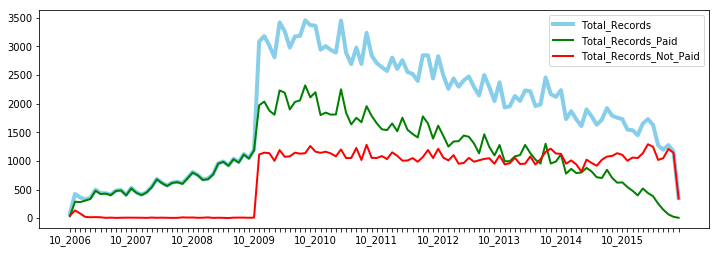

In [58]:
plt.figure(figsize=(12,4))
plt.plot('month_year','Total_Records', data=total_month_year,  marker='', markersize=12, color='skyblue', linewidth=4)
plt.plot('month_year','Total_Records_Paid', data=paid_month_year, color='green', linewidth=2)
plt.plot('month_year','Total_Records_Not_Paid', data=not_paid_month_year, marker='', color='red', linewidth=2)
ax = plt.gca()
temp = ax.xaxis.get_ticklabels()
temp = list(set(temp) - set(temp[::12]))
for label in temp:
    label.set_visible(False)
plt.legend()
plt.show()
## this overlapping line graph shows that there are more records with missing paid_dates overtime! 
## at beginning of time series, there are close to 0 records without paid_dates, up until the end of 2008/beginning of 2009
## There is a massive spike in the number of records at the end of 2008/beginning of 2009 (makes sense...)
## At the end of 2009/beginning of 2010, the number of total records and the number of paid records starts declining 
## However, At the end of 2009/beginning of 2010, the numer of total records not paid (without paid_date) increases (slightly) over time
## While the amount of records with no paid_date (unpaid) is less than the number of records with paid_dates, the records
## without paid_dates overtake the records WITH paid_dates at the beginning-middle of 2014
## Given that our dataset ends in 2016, it's possible some of these records will be paid after 09/2016, which is when our dataset ended
## Another analysis I could do is see if the proportion of record_types/record_source_types vary over time as well
## Looks like there are seasonal spikes both at the beginning and end of the year - going off of this chart and the
## average monthly chart, there are seasonal spikes in records filed in March and August 

In [59]:
df_amount_not_null.groupby('public_record_source_type_code')['amount'].mean().sort_values(ascending=False)
## average amount per record_source_type, CC, CR, and CL have highest average amount values

public_record_source_type_code
CC   13955
CR   13579
CL   12025
SU    8512
RD    7702
DC    4637
MU    3378
CI    2876
JU    2336
CT    2316
SC    2091
CY    2088
CP    2060
MA    2036
PC    1731
CN     720
Name: amount, dtype: float64

In [60]:
df_amount_not_null.groupby('public_record_type_code')['amount'].mean().sort_values(ascending=False)
## average amount per record_type, FT,PF,TB have highest average amount values

public_record_type_code
FT   33205
PF   23991
TB   11739
CP    7714
CB    5245
SL    3238
CJ    3157
RL    2582
PL    1843
PC    1792
TL     576
Name: amount, dtype: float64

In [61]:
df['year_int'] = df.year.astype(int)
df_2006_2008 = df[df['year_int'] < 2009]
print(df_2006_2008['paid_date'].isna().sum()) ## confirming that there are very few unpaid records in early years
print(df_2006_2008['paid_date'].notna().sum())

502
13294


In [62]:
print(len(df['public_record_type_code'].unique()))
print(len(df['public_record_source_type_code'].unique()))
Top_3_record_type_list = record_type_proportions.index.values[0:3].tolist()
Top_3_record_type_list

23
21


['CJ', '7X', 'PC']

In [63]:
df_top_3_record_types = df[(df['public_record_type_code'] == Top_3_record_type_list[0]) |(df['public_record_type_code'] == Top_3_record_type_list[1]) | (df['public_record_type_code'] == Top_3_record_type_list[2])]
print(df_top_3_record_types.shape[0])
df_top_3_record_types.head()

141716


,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,month,year,month_year,year_int
0,1346747,ZP,99,CJ,2013-06-04,2013-01-29,NaT,1209,CI,I,1,1,2013,1_2013,2013
1,1346748,ZP,485,7X,2014-09-25,2014-05-06,2014-09-24,nan,FE,I,1,5,2014,5_2014,2014
3,1346754,ZP,1,7X,2013-01-29,2012-09-28,2013-01-28,nan,FE,C,1,9,2012,9_2012,2012
7,1346760,Z,13Q,CJ,2016-06-22,2016-04-01,NaT,10116,CI,I,1,4,2016,4_2016,2016
8,1346766,ZP,52Z,CJ,2016-05-13,2014-08-11,NaT,1590,CI,I,1,8,2014,8_2014,2014


In [64]:
grouped_top_3 = df_top_3_record_types.groupby(['year', 'public_record_type_code'])['analytics_matchkey'].size()
grouped_top_3.head()

year  public_record_type_code
2006  7X                          396
2007  7X                         3721
2008  7X                         5322
2009  7X                         7269
      CJ                         1712
Name: analytics_matchkey, dtype: int64

In [65]:
record_type_pcts = grouped_top_3.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
record_type_pcts = record_type_pcts.to_frame()
record_type_pcts = record_type_pcts.reset_index()
record_type_pcts = record_type_pcts.set_index(['year', 'public_record_type_code']).analytics_matchkey

Text(0.5, 1.0, 'Proportion of public_record_type per Year')

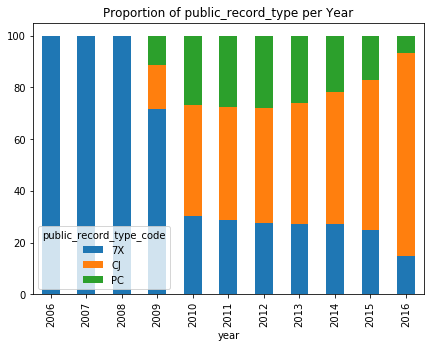

In [66]:
record_type_pcts.unstack().plot(kind='bar', stacked=True, figsize=(7,5));
plt.title("Proportion of public_record_type per Year")
## First three years are all type 7X (when comparing top 3 record_types),
## then progressively proportion becomes more and more type CJ compared to other record_types within the top 3

In [67]:
Top_5_public_record_source_types = df['public_record_source_type_code'].value_counts(normalize=True)[0:5]*100 
Top_3_record_source_type_list = Top_5_public_record_source_types.index.values[0:3].tolist()
Top_3_record_source_type_list

['CI', 'FE', 'RD']

In [68]:
df_top_3_record_source_types = df[(df['public_record_source_type_code'] == Top_3_record_source_type_list[0]) |(df['public_record_source_type_code'] == Top_3_record_source_type_list[1]) | (df['public_record_source_type_code'] == Top_3_record_source_type_list[2])]
print(df_top_3_record_source_types.shape[0])
df_top_3_record_source_types.head()

210998


,analytics_matchkey,industry_code_kind_of_business,reporting_subscriber_code,public_record_type_code,effective_date_date_verified,filed_date,paid_date,amount,public_record_source_type_code,equal_credit_opportunity_act_code,legislative_prohibited_code,month,year,month_year,year_int
0,1346747,ZP,99,CJ,2013-06-04,2013-01-29,NaT,1209,CI,I,1,1,2013,1_2013,2013
1,1346748,ZP,485,7X,2014-09-25,2014-05-06,2014-09-24,nan,FE,I,1,5,2014,5_2014,2014
2,1346754,Z,11R,SL,2012-01-24,2011-04-05,NaT,2248,RD,I,1,4,2011,4_2011,2011
3,1346754,ZP,1,7X,2013-01-29,2012-09-28,2013-01-28,nan,FE,C,1,9,2012,9_2012,2012
4,1346756,ZP,1,RL,2014-09-13,2007-02-02,2014-08-01,406,RD,I,1,2,2007,2_2007,2007


In [69]:
grouped_top_3_source = df_top_3_record_source_types.groupby(['year', 'public_record_source_type_code'])['analytics_matchkey'].size()
grouped_top_3_source.head()

year  public_record_source_type_code
2006  CI                                   5
      FE                                 411
      RD                                 372
2007  CI                                   9
      FE                                3676
Name: analytics_matchkey, dtype: int64

In [70]:
record_source_type_pcts = grouped_top_3_source.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
record_source_type_pcts = record_source_type_pcts.to_frame()
record_source_type_pcts = record_source_type_pcts.reset_index()
record_source_type_pcts = record_source_type_pcts.set_index(['year', 'public_record_source_type_code']).analytics_matchkey

Text(0.5, 1.0, 'Proportion of public_record_source_type per Year')

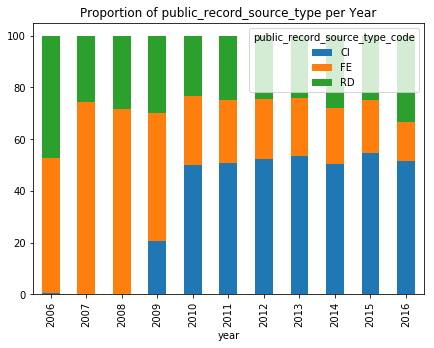

In [71]:
record_source_type_pcts.unstack().plot(kind='bar', stacked=True, figsize=(7,5));
plt.title("Proportion of public_record_source_type per Year")
## First three years are only FE and RD, of top 3 record_source_types
## then from 2010 and on CI is the largest proportion within public_record_source_types (of top 3 record_source_types)